In [1]:
import os,cv2
from tqdm import tqdm
import numpy as np
from transformers import AutoFeatureExtractor,TFViTMAEModel

In [ ]:
features_model = AutoFeatureExtractor.from_pretrained("facebook/vit-mae-base")

In [2]:
path = "micc-mf2000/"
data = []
labels = []
for folders in os.listdir(path):
    folder = path + folders
    print(folder)
    for items in tqdm(os.listdir(folder)):
        item = folder + '/' + items
        try:
            image = cv2.resize(cv2.imread(item),(64,64))       
            #input_ = features_model(image,return_tensors="tf")['pixel_values'].numpy()[0]
            #nimage = cv2.resize(input_,(64,64))
            #nimage = input_.T
            data.append(image)
            if folder == 'micc-mf2000/morphed':
                labels.append(1)
            else:
                labels.append(0)
        except:
            pass

micc-mf2000/morphed


100%|████████████████████████████████████████████████████████████████████████████████| 701/701 [00:46<00:00, 15.07it/s]


micc-mf2000/real


100%|██████████████████████████████████████████████████████████████████████████████| 1300/1300 [01:05<00:00, 19.75it/s]


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import optimizers

In [4]:
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

In [5]:
len(data),len(labels)

(2000, 2000)

In [6]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels,2)

In [7]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(1500, 64, 64, 3) (500, 64, 64, 3) (1500, 2) (500, 2)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

valAug = ImageDataGenerator()

In [14]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(weights = 'imagenet', include_top=False, input_shape=(64, 64, 3))
flat = Flatten()(model.layers[-2].output)
output = Dense(2, activation='softmax')(flat)
model = Model(model.input, output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='./logs',write_graph=True, write_images=False)

In [17]:
# H = model.fit(x=trainAug.flow(trainX, trainY, batch_size=8),steps_per_epoch=len(trainX) // 8, validation_data=valAug.flow(testX, testY),
# validation_steps=len(testX) // 8,epochs=25,callbacks=[tensorboard])

H = model.fit(trainX, trainY, batch_size=64, validation_data=(testX, testY),epochs=25,callbacks=[tensorboard])

Epoch 1/25
188/188 [==============================] - 15s 40ms/step - loss: 47.7330 - accuracy: 0.5540 - val_loss: 58.6507 - val_accuracy: 0.6200
Epoch 2/25
188/188 [==============================] - 6s 33ms/step - loss: 31.2736 - accuracy: 0.5527 - val_loss: 9.5904 - val_accuracy: 0.3800
Epoch 3/25
188/188 [==============================] - 6s 33ms/step - loss: 25.4063 - accuracy: 0.5533 - val_loss: 18.9995 - val_accuracy: 0.3800
Epoch 4/25
188/188 [==============================] - 6s 34ms/step - loss: 20.5155 - accuracy: 0.5520 - val_loss: 4.0604 - val_accuracy: 0.4660
Epoch 5/25
188/188 [==============================] - 6s 34ms/step - loss: 15.7399 - accuracy: 0.5753 - val_loss: 10.5597 - val_accuracy: 0.6200
Epoch 6/25
188/188 [==============================] - 6s 34ms/step - loss: 14.5184 - accuracy: 0.5693 - val_loss: 60.6844 - val_accuracy: 0.3800
Epoch 7/25
188/188 [==============================] - 6s 34ms/step - loss: 9.9363 - accuracy: 0.6433 - val_loss: 30.3546 - val_accu

In [18]:
model.save('morph_res1.h5')

In [19]:
acc = model.evaluate(testX,testY, verbose=0)
print("Test Loss is: ", acc[0])
print("Test accuracy is: ", acc[1])

Test Loss is:  0.34426337480545044
Test accuracy is:  0.9399999976158142


In [20]:
y_pred = model.predict(testX)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(testY, axis=1)

In [21]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)   
    A =(((C.T)/(C.sum(axis=1))).T)    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))    
    labels = [0,1]
    cmap=sns.light_palette("blue")    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")    
    plt.show()

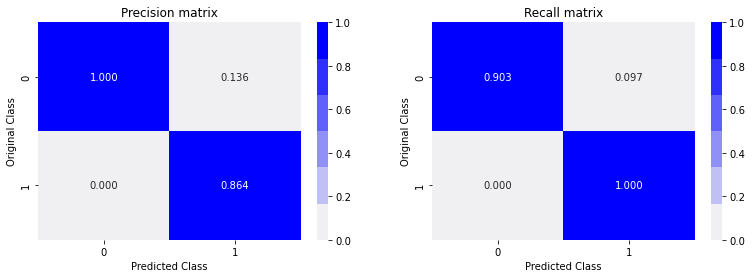

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix
import seaborn as sns

plot_confusion_matrix(y_test, y_pred)

In [ ]:
last = "conv5_block3_3_conv"

In [34]:
import tensorflow as tf

IMAGE_PATH = 'test/micc_fake.jpg'
LAYER_NAME = 'conv5_block3_add'

image =cv2.imread(IMAGE_PATH)
#input_ = features_model(image,return_tensors="tf")['pixel_values'].numpy()[0]
#nimage = input_.T
img1 = np.array(cv2.resize(image, (64,64)),dtype="float32") / 255.0
img2 = np.expand_dims(img1,axis=0)
#img2 = np.array(img2,dtype="float32") / 255.0
i = model.predict(img2)[0]
print(i)
grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAYER_NAME).output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img1]))
    loss = predictions[:,0]

output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]  * 1e+08
gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (image.shape[1], image.shape[0]))
denom = (cam.max() - cam.min())# + 1e-16
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / denom
cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
print(image.shape, cam.shape)
output_image = cv2.addWeighted(cv2.cvtColor(image.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)

cv2.imwrite('7.png', output_image)

[1. 0.]
(1536, 2048, 3) (1536, 2048, 3)


C:\Users\prave\AppData\Local\Temp/ipykernel_13716/2049085659.py:36: RuntimeWarning: invalid value encountered in true_divide
  heatmap = (cam - cam.min()) / denom


True